In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
user_df = pd.read_csv('./data/user_profile.csv')

In [3]:
user_df.head()

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,2,52.0,14.0,6.0,43.0,3.0,33.0,0.0,29.0,41.0,2.0,18.0,34.0,9.0,6.0
1,4,40.0,2.0,4.0,28.0,0.0,14.0,0.0,20.0,24.0,0.0,6.0,6.0,0.0,2.0
2,5,24.0,8.0,18.0,24.0,0.0,30.0,0.0,22.0,14.0,2.0,14.0,26.0,4.0,6.0
3,7,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
4,8,6.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,2.0,0.0,0.0,0.0


In [4]:
user_df.shape

(33918, 15)

In [5]:
user_df.describe()

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
count,3.391800e+04,33918.000000,33918.000000,33918.000000,33918.000000,33918.000000,33918.000000,33918.000000,33918.000000,33918.000000,33918.000000,33918.000000,33918.000000,33918.000000,33918.000000
mean,1.064585e+06,5.516334,3.492128,2.307359,3.623062,1.001356,3.046583,0.001769,5.085058,4.748246,0.462763,1.017277,2.270004,0.315821,0.986349
std,4.976768e+05,7.610825,4.226876,3.840945,4.759554,2.353706,4.623319,0.072828,5.230443,7.215123,1.054972,2.342241,4.309794,1.363292,1.950221
min,2.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.814510e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.044066e+06,3.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.451875e+06,9.000000,6.000000,3.000000,6.000000,0.000000,3.000000,0.000000,9.000000,6.000000,0.000000,0.000000,3.000000,0.000000,2.000000
max,2.103114e+06,63.000000,18.000000,38.000000,48.000000,15.000000,39.000000,3.000000,32.000000,54.000000,6.000000,18.000000,54.000000,15.000000,12.000000


In [6]:
feature_names = list(user_df.columns[1:])
feature_names

['Database',
 'Python',
 'CloudComputing',
 'DataAnalysis',
 'Containers',
 'MachineLearning',
 'ComputerVision',
 'DataScience',
 'BigData',
 'Chatbot',
 'R',
 'BackendDev',
 'FrontendDev',
 'Blockchain']

In [7]:
scaler = StandardScaler()
user_df[feature_names] = scaler.fit_transform(user_df[feature_names])

In [8]:
user_df.describe()

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
count,3.391800e+04,3.391800e+04,3.391800e+04,3.391800e+04,3.391800e+04,3.391800e+04,3.391800e+04,3.391800e+04,3.391800e+04,3.391800e+04,3.391800e+04,3.391800e+04,3.391800e+04,3.391800e+04,3.391800e+04
mean,1.064585e+06,1.173135e-17,8.924206e-17,1.089340e-17,-9.217489e-18,-1.072581e-16,4.943926e-17,1.298828e-17,7.206401e-17,4.357359e-17,-3.686996e-17,1.235982e-17,-6.536038e-17,1.194084e-17,1.089340e-17
std,4.976768e+05,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,2.000000e+00,-7.248117e-01,-8.261845e-01,-6.007357e-01,-7.612299e-01,-4.254443e-01,-6.589699e-01,-2.429002e-02,-9.722184e-01,-6.581060e-01,-4.386561e-01,-4.343241e-01,-5.267161e-01,-2.316637e-01,-5.057703e-01
25%,6.814510e+05,-7.248117e-01,-8.261845e-01,-6.007357e-01,-7.612299e-01,-4.254443e-01,-6.589699e-01,-2.429002e-02,-9.722184e-01,-6.581060e-01,-4.386561e-01,-4.343241e-01,-5.267161e-01,-2.316637e-01,-5.057703e-01
50%,1.044066e+06,-3.306305e-01,-1.164300e-01,-6.007357e-01,-1.309095e-01,-4.254443e-01,-6.589699e-01,-2.429002e-02,-3.986448e-01,-3.809064e-01,-4.386561e-01,-4.343241e-01,-5.267161e-01,-2.316637e-01,-5.057703e-01
75%,1.451875e+06,4.577320e-01,5.933245e-01,1.803335e-01,4.994110e-01,-4.254443e-01,-1.007580e-02,-2.429002e-02,7.485024e-01,1.734929e-01,-4.386561e-01,-4.343241e-01,1.693832e-01,-2.316637e-01,5.197695e-01
max,2.103114e+06,7.552994e+00,3.432343e+00,9.292808e+00,9.323897e+00,5.947577e+00,7.776654e+00,4.116916e+01,5.145900e+00,6.826284e+00,5.248782e+00,7.250736e+00,1.200307e+01,1.077128e+01,5.647468e+00


In [9]:
user = user_df.iloc[-1,1:]

In [10]:
features = user_df.loc[:,user_df.columns!='user']
features

,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,6.107663,2.486003,0.961403,8.273363,0.849160,6.478865,-0.02429,4.572326,5.024486,1.457157,7.250736,7.362409,6.370102,2.570849
1,4.530938,-0.353015,0.440690,5.121761,-0.425444,2.369203,-0.02429,2.851606,2.668290,-0.438656,2.127362,0.865482,-0.231664,0.519769
2,2.428638,1.066494,4.085680,4.281334,-0.425444,5.829971,-0.02429,3.233988,1.282291,1.457157,5.542945,5.506144,2.702454,2.570849
3,-0.462024,-0.826185,-0.600736,-0.341016,-0.425444,-0.658970,-0.02429,-0.972218,-0.380906,-0.438656,-0.434324,-0.526716,-0.231664,-0.505770
4,0.063551,-0.826185,-0.600736,0.079197,-0.425444,-0.658970,-0.02429,-0.972218,0.173493,-0.438656,0.419571,-0.526716,-0.231664,-0.505770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33913,-0.724812,-0.826185,0.180334,-0.761230,2.123764,-0.658970,-0.02429,-0.972218,-0.658106,-0.438656,-0.434324,0.169383,-0.231664,-0.505770
33914,-0.724812,-0.826185,0.180334,-0.761230,2.123764,-0.658970,-0.02429,-0.972218,-0.658106,-0.438656,-0.434324,0.169383,-0.231664,-0.505770
33915,-0.724812,-0.826185,0.180334,-0.761230,2.123764,-0.658970,-0.02429,-0.972218,-0.658106,-0.438656,-0.434324,0.169383,-0.231664,-0.505770
33916,-0.724812,-0.826185,0.180334,-0.761230,2.123764,-0.658970,-0.02429,-0.972218,-0.658106,-0.438656,-0.434324,0.169383,-0.231664,-0.505770


In [52]:
user_ids = user_df.loc[:,user_df.columns=='user']
user_ids

pandas.core.frame.DataFrame

In [12]:
s = []
for k in range(1,30):
    km = KMeans(n_init='auto',n_clusters=k)
    km.fit_predict(features)
    s.append(km.inertia_)


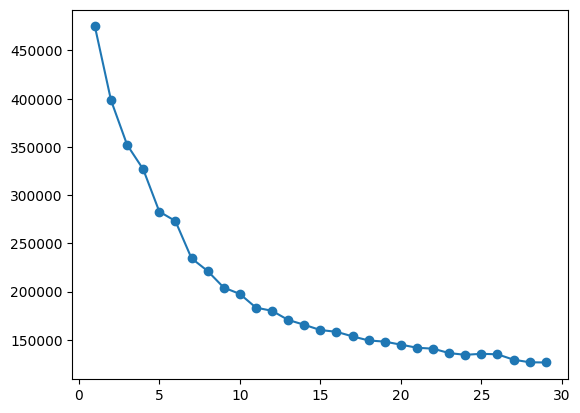

In [13]:
plt.plot(list(range(1,30)),s)
plt.scatter(list(range(1,30)),s)

In [14]:
cluster_labels = [None] * len(user_ids)

In [15]:
features.iloc[0,:]

Database           6.107663
Python             2.486003
CloudComputing     0.961403
DataAnalysis       8.273363
Containers         0.849160
MachineLearning    6.478865
ComputerVision    -0.024290
DataScience        4.572326
BigData            5.024486
Chatbot            1.457157
R                  7.250736
BackendDev         7.362409
FrontendDev        6.370102
Blockchain         2.570849
Name: 0, dtype: float64

In [16]:
model = KMeans(n_init='auto',n_clusters=20)
model.fit_predict(features)
cluster_labels = model.labels_
model.labels_

array([6, 6, 5, ..., 7, 7, 7])

In [17]:
def combine_cluster_labels(user_ids,labels):
    labels_df = pd.DataFrame(labels)
    cluster_df = pd.merge(user_ids,labels_df,left_index=True,right_index=True)
    cluster_df.columns = ['user','cluster']
    return cluster_df

In [18]:
cluster_df = combine_cluster_labels(user_ids,cluster_labels)
cluster_df

,user,cluster
0,2,6
1,4,6
2,5,5
3,7,3
4,8,3
...,...,...
33913,2103110,7
33914,2103111,7
33915,2103112,7
33916,2103113,7


In [19]:
features = user_df.loc[:, user_df.columns != 'user']
user_ids = user_df.loc[:, user_df.columns == 'user']
feature_names = list(user_df.columns[1:])

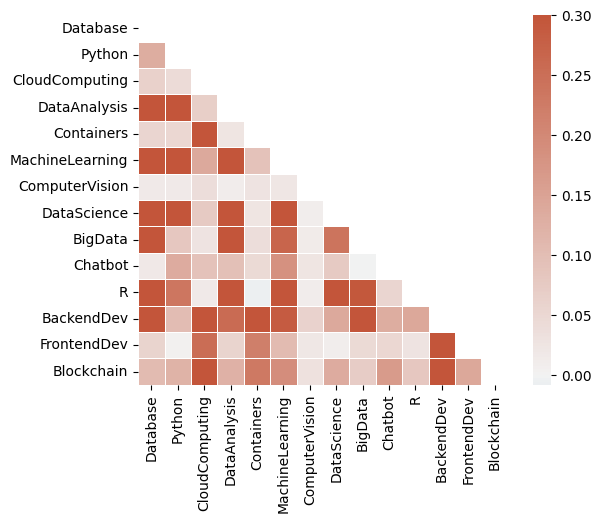

In [20]:
corr = features.cov()
mask = np.triu(np.ones_like(corr,dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=.3,square=True,center=0,linewidths=.5)
plt.show()

In [21]:
r = []
for n in range(1,15):
    pca = PCA(n_components=n)
    pca.fit(features)
    r.append(pca.explained_variance_ratio_.sum())
r

[0.2875549784391327,
 0.4630795699447483,
 0.5760975613035326,
 0.6487168497330429,
 0.7194584402653429,
 0.7881826233188973,
 0.8429277764532036,
 0.8944257484927811,
 0.9272442649004111,
 0.9544369118259212,
 0.9733531494690857,
 0.9870311575671087,
 0.997915935924799,
 1.0000000000000002]

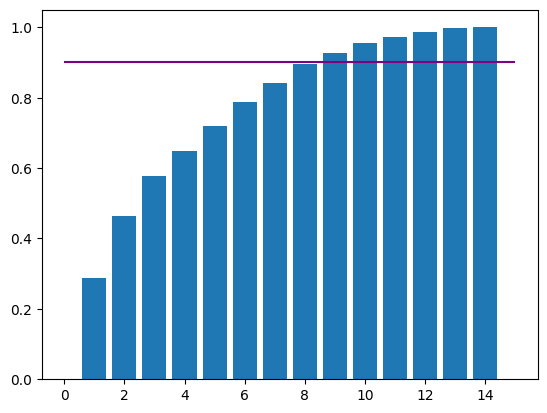

In [22]:
plt.bar(x=list(range(1,15)),height=r)
plt.hlines(y=0.9,xmax=15.0,xmin=0.0,colors='purple')
plt.show()

In [23]:
pca = PCA(n_components=9)
features_red = pca.fit_transform(features)
merged_pca_df = user_ids.join(pd.DataFrame(features_red)).reset_index()
merged_pca_df.rename(columns={0:'PC0',1:'PC1',2:'PC2',3:'PC3',4:'PC4',5:'PC5',6:'PC6',7:'PC7',8:'PC8'},inplace=True)
merged_pca_df

,index,user,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0,2,17.776505,0.214807,1.730334,2.561084,-3.815757,2.720025,0.667244,2.317686,0.869954
1,1,4,7.148912,-2.842153,2.359711,-0.578415,0.399162,-0.136375,0.547206,0.471087,0.033399
2,2,5,11.365622,1.882749,-1.523602,1.072117,-1.706639,0.888501,1.663000,2.944416,2.097248
3,3,7,-1.833422,-0.279382,0.564884,0.054091,-0.064608,0.165841,0.031377,0.039270,0.210813
4,4,8,-1.048158,-0.685885,1.073001,0.006544,-0.005810,0.118987,0.116640,0.559713,0.186287
...,...,...,...,...,...,...,...,...,...,...,...
33913,33913,2103110,-1.461017,1.684741,0.211843,-1.010527,0.647546,0.148320,-0.778566,0.452503,0.242145
33914,33914,2103111,-1.461017,1.684741,0.211843,-1.010527,0.647546,0.148320,-0.778566,0.452503,0.242145
33915,33915,2103112,-1.461017,1.684741,0.211843,-1.010527,0.647546,0.148320,-0.778566,0.452503,0.242145
33916,33916,2103113,-1.461017,1.684741,0.211843,-1.010527,0.647546,0.148320,-0.778566,0.452503,0.242145


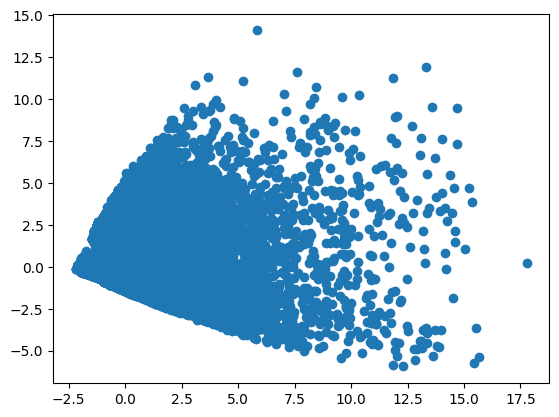

In [24]:
plt.scatter(features_red[:,0],features_red[:,1])

In [25]:
merged_pca_df.reset_index(drop=True,inplace=True)

In [26]:
model = KMeans(n_init='auto',n_clusters=20)
model.fit_predict(merged_pca_df)

array([5, 5, 5, ..., 7, 7, 7])

In [27]:
clustered_users = user_ids.join(pd.DataFrame(km.labels_))

In [53]:
test_user_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/rs_content_test.csv"
test_users_df = pd.read_csv(test_user_url)
test_users_df.head(50)

,user,item,rating
0,1502801,RP0105EN,3.0
1,1609720,CNSC02EN,2.0
2,1347188,CO0301EN,3.0
3,755067,ML0103EN,3.0
4,538595,BD0115EN,3.0
5,1773079,CC0201EN,3.0
6,603361,BC0201EN,3.0
7,1122903,RP0101EN,3.0
8,714414,TA0105,3.0
9,1688159,LB0107ENv1,3.0


In [29]:
test_users_df = test_users_df[['user','item']]
labelled = pd.merge(test_users_df,cluster_df,left_on='user',right_on='user')
labelled.rename(columns={0:'cluster'},inplace=True)
labelled

,user,item,cluster
0,1502801,RP0105EN,17
1,1502801,BD0131EN,17
2,1502801,BD0212EN,17
3,1502801,BD0115EN,17
4,1502801,BD0211EN,17
...,...,...,...
9397,630511,BD0121EN,4
9398,630511,SC0101EN,4
9399,630511,BD0111EN,4
9400,630511,BD0115EN,4


In [30]:
courses_clusters = labelled[['item','cluster']]
courses_clusters['count'] = [1] * len(courses_clusters)
courses_clusters = courses_clusters.groupby(['cluster','item']).agg(enrollments=('count','sum')).reset_index()
courses_clusters

,cluster,item,enrollments
0,0,AI0111EN,2
1,0,BC0101EN,81
2,0,BC0201EN,34
3,0,BC0202EN,6
4,0,BD0101EN,52
...,...,...,...
1216,19,ST0101EN,9
1217,19,SW0201EN,1
1218,19,TA0105,3
1219,19,TA0105EN,2


In [31]:
courses_clusters[courses_clusters['item']=='BC0201EN']

,cluster,item,enrollments
2,0,BC0201EN,34
72,1,BC0201EN,2
139,2,BC0201EN,1
205,3,BC0201EN,17
378,5,BC0201EN,3
488,7,BC0201EN,3
604,10,BC0201EN,5
675,11,BC0201EN,10
734,12,BC0201EN,2
804,13,BC0201EN,3


In [32]:
processed = pd.read_csv('./data/course_processed.csv')
processed

,COURSE_ID,TITLE,DESCRIPTION
0,ML0201EN,robots are coming build iot apps with watson ...,have fun with iot and learn along the way if ...
1,ML0122EN,accelerating deep learning with gpu,training complex deep learning models with lar...
2,GPXX0ZG0EN,consuming restful services using the reactive ...,learn how to use a reactive jax rs client to a...
3,RP0105EN,analyzing big data in r using apache spark,apache spark is a popular cluster computing fr...
4,GPXX0Z2PEN,containerizing packaging and running a sprin...,learn how to containerize package and run a ...
...,...,...,...
302,excourse89,javascript jquery and json,in this course we ll look at the javascript l...
303,excourse90,programming foundations with javascript html ...,learn foundational programming concepts e g ...
304,excourse91,front end web development with react,this course explores javascript based front en...
305,excourse92,introduction to web development,this course is designed to start you on a path...


In [33]:
course_ids = pd.DataFrame(processed.loc[:,"COURSE_ID"])

In [34]:
sim_df = pd.read_csv('./data/sim.csv')

In [35]:
pca = PCA(n_components=14)
features_red = pca.fit_transform(sim_df)
merged = course_ids.join(pd.DataFrame(features_red)).reset_index().drop('index',axis=1)

In [36]:
merged

,COURSE_ID,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,ML0201EN,-0.687675,-0.099087,0.102062,-0.069048,-0.383736,-0.029912,-0.279525,0.165830,0.148561,0.039118,0.511304,0.470377,0.213440,-0.150415
1,ML0122EN,-0.481107,1.224940,-0.075933,0.187879,-0.270532,-0.069114,0.051716,0.173586,0.269973,0.124606,-0.054398,0.045735,-0.081227,-0.267919
2,GPXX0ZG0EN,-1.391842,-0.603609,-0.578082,0.733493,0.204340,0.070078,0.370010,-0.058460,0.351515,-0.013193,-0.137719,0.078479,0.345565,0.151004
3,RP0105EN,2.086723,-0.444959,-0.146464,0.111447,-0.237080,-0.515266,0.142725,-0.452567,-0.524734,0.200705,0.042049,-0.305512,0.108029,-0.015844
4,GPXX0Z2PEN,-1.456976,-0.315143,-0.203836,-0.168021,-0.166922,0.111921,0.035533,0.496816,-0.167485,0.151649,0.261420,-0.199076,0.125653,0.115551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,excourse89,-0.641550,-0.092232,0.051701,-0.298516,0.174746,-0.076948,-0.006033,0.222919,-0.078279,0.028329,-0.002144,0.016046,0.132079,-0.130400
303,excourse90,-0.836075,-0.048648,-0.055225,0.143965,0.639179,-0.001604,-0.266857,0.333298,-0.324738,-0.109944,-0.016188,0.196951,0.334789,-0.246243
304,excourse91,-0.702748,0.097260,0.173550,-0.033911,0.571591,-0.137285,0.047744,0.453518,0.124610,-0.034418,0.154709,-0.014837,0.076386,-0.047744
305,excourse92,-0.762911,0.082124,0.177369,-0.184500,0.554962,-0.068804,0.062985,0.470004,-0.430701,-0.123545,-0.177843,0.265093,0.253353,-0.182505


In [37]:
pc_rename = {i:f'PC{i}' for i in range(len(merged.columns)-1)}
pc_rename

{0: 'PC0',
 1: 'PC1',
 2: 'PC2',
 3: 'PC3',
 4: 'PC4',
 5: 'PC5',
 6: 'PC6',
 7: 'PC7',
 8: 'PC8',
 9: 'PC9',
 10: 'PC10',
 11: 'PC11',
 12: 'PC12',
 13: 'PC13'}

In [38]:
merged.rename(columns=pc_rename,inplace=True)
merged

,COURSE_ID,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,ML0201EN,-0.687675,-0.099087,0.102062,-0.069048,-0.383736,-0.029912,-0.279525,0.165830,0.148561,0.039118,0.511304,0.470377,0.213440,-0.150415
1,ML0122EN,-0.481107,1.224940,-0.075933,0.187879,-0.270532,-0.069114,0.051716,0.173586,0.269973,0.124606,-0.054398,0.045735,-0.081227,-0.267919
2,GPXX0ZG0EN,-1.391842,-0.603609,-0.578082,0.733493,0.204340,0.070078,0.370010,-0.058460,0.351515,-0.013193,-0.137719,0.078479,0.345565,0.151004
3,RP0105EN,2.086723,-0.444959,-0.146464,0.111447,-0.237080,-0.515266,0.142725,-0.452567,-0.524734,0.200705,0.042049,-0.305512,0.108029,-0.015844
4,GPXX0Z2PEN,-1.456976,-0.315143,-0.203836,-0.168021,-0.166922,0.111921,0.035533,0.496816,-0.167485,0.151649,0.261420,-0.199076,0.125653,0.115551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,excourse89,-0.641550,-0.092232,0.051701,-0.298516,0.174746,-0.076948,-0.006033,0.222919,-0.078279,0.028329,-0.002144,0.016046,0.132079,-0.130400
303,excourse90,-0.836075,-0.048648,-0.055225,0.143965,0.639179,-0.001604,-0.266857,0.333298,-0.324738,-0.109944,-0.016188,0.196951,0.334789,-0.246243
304,excourse91,-0.702748,0.097260,0.173550,-0.033911,0.571591,-0.137285,0.047744,0.453518,0.124610,-0.034418,0.154709,-0.014837,0.076386,-0.047744
305,excourse92,-0.762911,0.082124,0.177369,-0.184500,0.554962,-0.068804,0.062985,0.470004,-0.430701,-0.123545,-0.177843,0.265093,0.253353,-0.182505


In [39]:
num_clusters = 7
kmeans = KMeans(n_clusters=num_clusters)
clusters = kmeans.fit_predict(features_red)

C:\Users\lenov\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lenov\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [40]:
merged.iloc[:,2:]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,-0.099087,0.102062,-0.069048,-0.383736,-0.029912,-0.279525,0.165830,0.148561,0.039118,0.511304,0.470377,0.213440,-0.150415
1,1.224940,-0.075933,0.187879,-0.270532,-0.069114,0.051716,0.173586,0.269973,0.124606,-0.054398,0.045735,-0.081227,-0.267919
2,-0.603609,-0.578082,0.733493,0.204340,0.070078,0.370010,-0.058460,0.351515,-0.013193,-0.137719,0.078479,0.345565,0.151004
3,-0.444959,-0.146464,0.111447,-0.237080,-0.515266,0.142725,-0.452567,-0.524734,0.200705,0.042049,-0.305512,0.108029,-0.015844
4,-0.315143,-0.203836,-0.168021,-0.166922,0.111921,0.035533,0.496816,-0.167485,0.151649,0.261420,-0.199076,0.125653,0.115551
...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,-0.092232,0.051701,-0.298516,0.174746,-0.076948,-0.006033,0.222919,-0.078279,0.028329,-0.002144,0.016046,0.132079,-0.130400
303,-0.048648,-0.055225,0.143965,0.639179,-0.001604,-0.266857,0.333298,-0.324738,-0.109944,-0.016188,0.196951,0.334789,-0.246243
304,0.097260,0.173550,-0.033911,0.571591,-0.137285,0.047744,0.453518,0.124610,-0.034418,0.154709,-0.014837,0.076386,-0.047744
305,0.082124,0.177369,-0.184500,0.554962,-0.068804,0.062985,0.470004,-0.430701,-0.123545,-0.177843,0.265093,0.253353,-0.182505


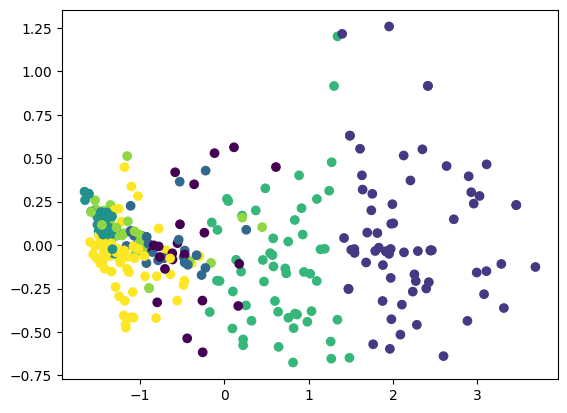

In [41]:
plt.scatter(merged.loc[:,'PC0'],merged.loc[:,'PC5'],c=clusters)

In [42]:
pd.set_option('display.max_colwidth', None)
joined = processed.join(pd.DataFrame(clusters)).reset_index().drop('DESCRIPTION',axis=1)


In [43]:
joined[joined[0]==6]

,index,COURSE_ID,TITLE,0
0,0,ML0201EN,robots are coming build iot apps with watson swift and node red,6
4,4,GPXX0Z2PEN,containerizing packaging and running a spring boot application,6
7,7,GPXX0FTCEN,learn how to use docker containers for iterative development,6
9,9,GPXX06RFEN,create your first mongodb database,6
12,12,WA0103EN,watson analytics for social media,6
...,...,...,...,...
291,291,excourse78,natural language processing with sequence models,6
292,292,excourse79,natural language processing with probabilistic models,6
300,300,excourse87,html css and javascript for web developers,6
301,301,excourse88,javascript basics,6


In [44]:
bows_df = pd.read_csv('./data/courses_bows.csv')
bows_df = bows_df[['doc_id', 'token', 'bow']]

In [45]:
def pivot_two_bows(basedoc, comparedoc):
    base = basedoc.copy()
    base['type'] = 'base'
    compare = comparedoc.copy()
    compare['type'] = 'compare'

    merged = pd.concat([base, compare], ignore_index=True)

    pivot_table = merged.pivot_table(index=['doc_id', 'type'], columns='token', fill_value=0)

    pivot_table = pivot_table.reset_index()

    pivot_table.columns = pivot_table.columns.droplevel(0)

    pivot_table = pivot_table.rename_axis(columns=None)
    pivot_table[pivot_table.columns[2:]] = pivot_table.iloc[:,2:].astype('float32')
    return pivot_table

In [46]:

course1 = bows_df[bows_df['doc_id'] == 'ML0151EN']
course2 = bows_df[bows_df['doc_id'] == 'ML0101ENv3']

bow_vectors = pivot_two_bows(course1, course2)
bow_vectors

,,,approachable,basics,beneficial,comparison,course,dives,free,future,...,relates,started,statistical,supervised,tool,tools,trends,unsupervised,using,vs
0,ML0101ENv3,compare,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
1,ML0151EN,base,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0


In [47]:
from scipy.spatial.distance import cosine


In [48]:
# s = []
# for j in processed.iloc[:,0]:
#     sims={}
#     for i in processed.iloc[:100,0]:
#         base = bows_df[bows_df['doc_id'] == j]
#         comparedoc = bows_df[bows_df['doc_id'] == i]
#         bow_vectors = pivot_two_bows(base, comparedoc)
#         similarity = 1 - cosine(bow_vectors.iloc[0, 2:], bow_vectors.iloc[1, 2:])
#         sims[i]=similarity
#     s.append(sims)

In [49]:
sim = pd.DataFrame(s)

In [50]:
#sim.to_csv('./data/similarity.csv',index=False)